In [1]:
import numpy as np
from matplotlib import pyplot as plt

import AFG31000 as awg
awg_ip = "192.168.0.178"

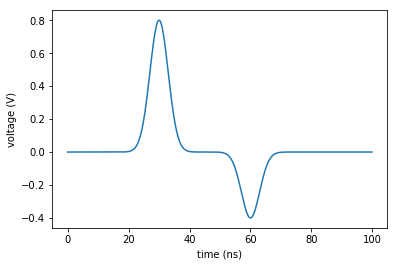

In [3]:
##################################################
##          create arbitrary waveform           ##
##################################################


def gauss(x, **kwargs):
  mu = kwargs.get("mu",0)
  sigma = kwargs.get("sigma",1)
  ## default amplitude generates bell curve with area = 1
  A = kwargs.get("A",1./(sigma*(2.*np.pi)**0.5))
  return A*np.exp(-(x-mu)**2/(2.*sigma**2))



period = 100e-9

x=np.arange(0,period,0.1e-9)

y=4*(    gauss(x,sigma=3e-9,mu=30e-9,A=200e-3)+    gauss(x,sigma=3e-9,mu=60e-9,A=-100e-3))

plt.plot(x*1e9,y)
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.show()



In [4]:
##################################################
##        send arbitrary waveform to CH1        ##
##################################################


awg.send_data(x,y,ip=awg_ip,trace=1,period=period)

target ip : 192.168.0.178
connect to device ...
*IDN?
TEKTRONIX,AFG31252,C011442,SCPI:99.0 FV:1.5.2
success!
preparing data for channel 1
sending data ...
waveform length: 200
sample length: 200
close socket


In [5]:
##################################################
##           send square pulse to CH2           ##
##################################################


awg.pulser(
    period=period,
    ip=awg_ip,
    trace=2,
    leading_edge=1e-9,
    trailing_edge=1e-9,
    on_val=0.25,
    idle_val=0,
    delay=10e-9,
    width=30e-9

)

target ip : 192.168.0.178
connect to device ...
*IDN?
TEKTRONIX,AFG31252,C011442,SCPI:99.0 FV:1.5.2
success!
preparing data for channel 2
sending data ...
waveform length: 200
sample length: 200
close socket
